In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Add project root to system path to allow importing modules
sys.path.append(os.path.abspath('..'))

from backtest.engine import BacktestEngine

In [2]:
# Load the prepared datasets
df = pd.read_parquet('../data/final_dataset.parquet')
bench_df = pd.read_parquet('../data/benchmark_csi300_monthly.parquet')

print(f"Data Loaded. Shape: {df.shape}")

Data Loaded. Shape: (381568, 34)


In [3]:
FACTOR_NAME = 'TUR'  # This will be replaced by the script
print(f"Analyzing Factor: {FACTOR_NAME}")

# Initialize Engine with Benchmark
engine = BacktestEngine(df, factor_name=FACTOR_NAME, benchmark_df=bench_df)

Analyzing Factor: TUR


In [4]:
# Run analysis using Value-Weighted sorting (Academic Standard)
summary = engine.run_analysis(weighting='vw')

# Display Key Metrics
print("Performance Summary:")
for k, v in summary.items():
    print(f"{k}: {v:.4f}")

正在运行因子分析：TUR...


/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Performance Summary:
IC均值: -0.0214
IC_IR: -0.1115
因子自相关性: 0.8651
多空年化收益: nan
多空夏普比率: 0.0799
FM回归t值: 1.6622
Q5年化收益: 0.2672
Q5夏普比率: 0.5302
Q5最大回撤: -0.9607
Q5换手率: 0.6058
Q5超额收益: -0.1258
Alpha: -0.0062
Beta: -0.0140


/Users/nachuanchen/Documents/Undergrad_Resources/资产管理与投资策略分析/AMQI/backtest/metrics.py:19: RuntimeWarning: invalid value encountered in scalar power
  ann_ret = (1 + total_return) ** (periods_per_year / n_periods) - 1


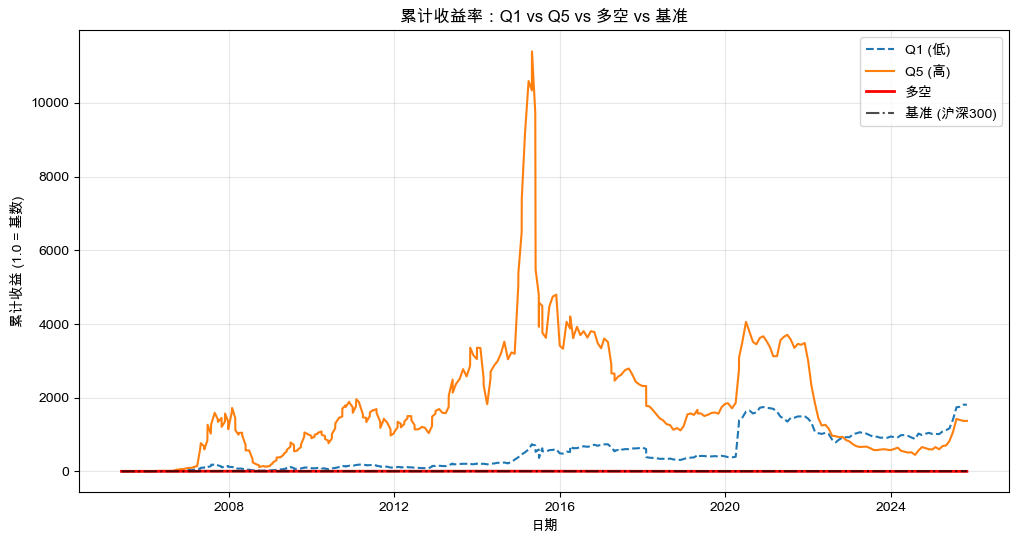

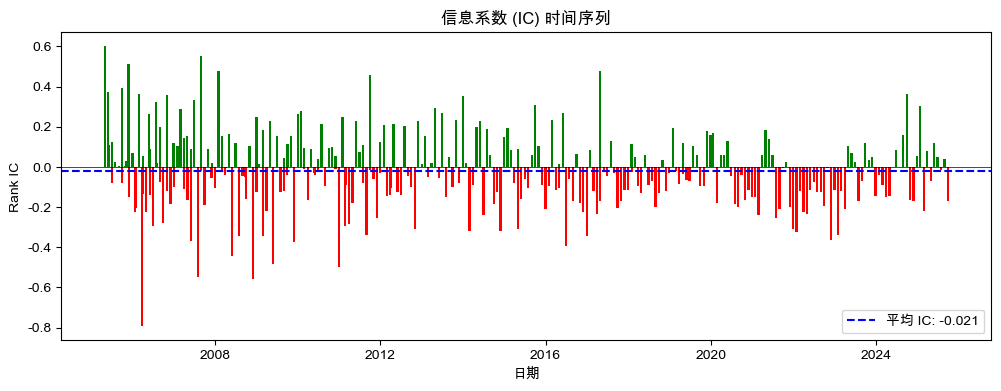

/Users/nachuanchen/Documents/Undergrad_Resources/资产管理与投资策略分析/AMQI/backtest/plotting.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ann_rets.index, y=ann_rets.values, palette='viridis')


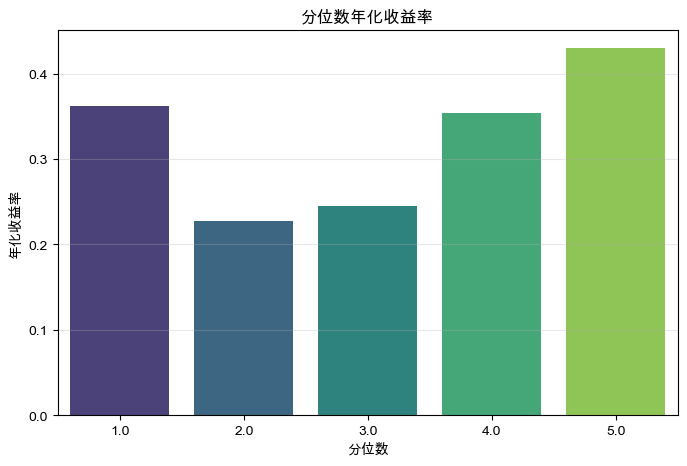

In [5]:
# Plot cumulative returns and IC series
engine.plot_results()
plt.show()